In [1]:
from scipy.stats import f as f_test
from scipy.stats import ncf
from scipy.stats import t as t_test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

### ANOVA

* Assumptions

1. Independence of the observations 

2. No significant outliers

3. Normality

4. Homogeneity of variances : The variance among the group should be approximately equal

It is important to note that ANOVA is not robust to violations to the assumption of independence. This is to say, that even if you violate the assumptions of homogeneity or normality, you can conduct the test and basically trust the findings. However, the results of the ANOVA are invalid if the independence assumption is violated. In general, with violations of homogeneity the analysis is considered robust if you have equal sized groups. With violations of normality, continuing with the ANOVA is generally ok if you have a large sample size.

* When to use ANOVA

1. No matter what distribution the population is, if the sample size is over 30, the sameple means approach normal distribution. If we want to compare multiple sample means, we use ANOVA.

2. Given the population is normal distribution, the sample means is thus normal distribution. If we want to compare multiple sample means, we use ANOVA.

---

### One-Way ANOVA

![](./resources/1_way_SS.PNG)

![](./resources/1_way_Fi.PNG)

[REFERENCE](https://www.alexanderdemos.org/ANOVA5.html)

---

### Two-Way ANOVA

We now have two factors, and we will test the main effect and interaction

* Main effect (Factor A: Rows): The independent effects of Length of Exposure on Perceived Ability

* Main effect (Factor B: Columns): The independent effects of Type of Exposure on Perceived Ability

* Interaction: The joint effects of Length and Type of Exposure on Perceived Ability

![](./resources/2_way_SS.PNG)

![](./resources/2_way_F.PNG)

[REFERENCE](https://www.alexanderdemos.org/ANOVA8.html)

---

### Main Effects vs Interaction

If the interaction is telling a conflicting story with the main effects, you may either not want to follow up the main effects or carefully explain them.

![](./resources/Interaction.PNG)

The above graph shows there is an interaction between (Watching, Reading, Thinking) and (Low, High). It means that even if we conclude there is significant difference in group (Low, High) from 2-way ANOVA. This conclusion does not always correct in different group (Watching, Reading, Thinking).

[REFERENCE](https://www.alexanderdemos.org/ANOVA9.html#Basic_Rules)

---

### Effect Size

The effect size tells us how much do the data differ from the hypothosis. SSB is the variation caused by treatment, and SST is the variation of Treatment + Noise.

![](./resources/effect_size.png)

| d | Effect Size |
| --- | --- |
| 0.14 | large |
| 0.06 | medium |
| 0.01 | small |

---

### Power Analysis

Power analysis answers questions like "how much statistical power does my study have?" and "how big a sample size do I need?".

![](./resources/power_analysis.PNG)

If H0 is not rejected, F score is in f-distribution.

If H0 is rejected, F score is in non-central f-distribution

![](./resources/f_distribution.PNG)

![](./resources/non_central_parameter.PNG) 
![](./resources/parameter.PNG)

We use MSW to estimate the variance.


---

### Post Hoc Test

ANOVA can only know whether the mean of three or more groups are the same. However, it can not tell us how one group differs from a certain group. We can not use t-test in this situation because the type I error will increase if we use t-test on the same group multiple times. Instead, we use post hoc test which is a more rigorous test than t-test.

![](./resources/FWER.PNG)

Tukey HSD(Honestly Sinificant Difference): This test determines whether there is a difference between the mean of all possible pairs. 

![](./resources/choose_post_hoc.jpg)

[REFERENCE 1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6193594/)

[REFERENCE 2](https://www.youtube.com/watch?v=u9h8qjxMV-Y&t=185s)


---

### Question 1

From our survey we can calculate Caffeiene consumption as a function of how much you
said you liked math. Here is a table of statistics based on our survey:

|| Not at all | Just a little | A fair amount | Very much |
|---|---|---|---|---|
| n | 14 | 56 | 75 | 6 |
|mean | 1.21 | 1.01 | 1.41 | 3 |
|SS | 7.8574 | 41.7456 | 354.1363 | 108 |
| ntotal | 151 |
|grand mean | 1.3065 |
|SStotal | 534.834 |

Calculate the standard errors of the mean for each of the 4 groups.

Make a bar graph of the means for each of the 4 groups with error bars as the standard
error of the means.

Using an alpha value of α = 0.05, is there difference in Caffeine consumption across the 4 groups of students who vary their preference for math?

* from [one_factor_ANOVA_tutorial.pdf](./resources/one_factor_ANOVA_tutorial.pdf)

In [2]:
n = np.array([14, 56, 75, 6])
n_total = np.sum(n)
mean = np.array([1.21, 1.01, 1.41, 3])
SSW_g = np.array([7.8574, 41.7456, 354.1363, 108])
mu = np.average(mean, weights=n)
SST = 534.834
alpha = 0.05

SSW = np.sum(SSW_g)
SSB = np.sum( np.square(mean - mu) * n )

k = 4
df_SSW = n_total - k
df_SSB = k - 1

H<sub>0 : There is no difference among group means

H<sub>1 : At lease one group differs significantly from the overrall mean of the dependent variable. 

In [3]:
MSW = SSW / df_SSW
MSB = SSB / df_SSB
f = MSB / MSW
print("F: ", f)

# dfn: numerator, dfd: denominator
f_crit = f_test.ppf(1 - alpha, dfn=df_SSB, dfd=df_SSW)
print("F_crit: ", f_crit)

p_value = 1 - f_test.cdf(f, dfn=df_SSB, dfd=df_SSW)
print("p_value: ", p_value)

eta_squared = SSB / SST 
print("eta_squared: ", eta_squared)

F:  2.208471453651477
F_crit:  2.6661487758521765
p_value:  0.08956999737639892
eta_squared:  0.04312463900725823


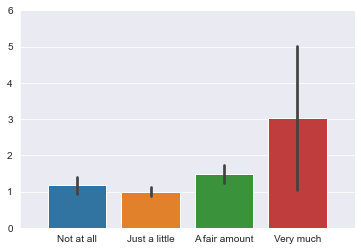

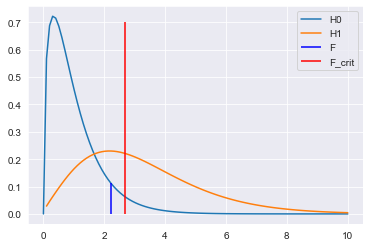

In [4]:
### standard deviation of the sample mean of each group
SW_g = np.sqrt(SSW_g / (n - 1)) / np.sqrt(n)
data = [0 for i in range(k)]
for i in range(k):
    data[i] = t_test.rvs(df=n[i]-1, loc=mean[i], scale=SW_g[i], size=100)

plt.figure(1)
plot = sns.barplot(data=data, ci='sd')
plot.set_xticklabels(["Not at all",  "Just a little", "A fair amount",  "Very much"])
plot.margins(0.1)
plot.set_ylim(0, 6)

### non-central parameter
nc = SSB / MSW

x = np.linspace(0, 10, num=100)
y0 = f_test.pdf(x, dfn=df_SSB, dfd=df_SSW)
y1 = ncf.pdf(x, dfn=df_SSB, dfd=df_SSW, nc=nc)
plt.figure(2)
plot = sns.lineplot(x=x, y=y0, label="H0")
plot = sns.lineplot(x=x, y=y1, label="H1")
plt.vlines(f, 0, f_test.pdf(f, dfn=df_SSB, dfd=df_SSW), 'b', label='F')
plt.vlines(f_crit, 0, 0.7, 'r', label='F_crit')
plt.legend()

#### Ans:

Since p_value > α, we failed to reject H<sub>0. 

There is not a significant difference in mean Caffeine consumption across the 4 groups of students who vary their preference.

The effect size calculated by eta-squared is 0.04 which is medium.


---

### Question 2

The Wine dataset consists of 3 different type of wine. 

Using an alpha value of α = 0.05, is there difference in the malic_acid across the 3 type of wine?

In [5]:
from sklearn.datasets import load_wine
wine = load_wine()
data_x = wine.data[:, 1]
data_y = wine.target
n_g = np.array([0, 0, 0])
for y in data_y:
    n_g[y] += 1

x = {0:data_x[:n_g[0]], 1:data_x[n_g[0]:n_g[0]+n_g[1]], 2:data_x[n_g[0]+n_g[1]:]}

alpha = 0.05
n = np.sum(n_g)

k = 3
df_SSB = k - 1
df_SSW = n - k
df_SST = n - 1

mean_g = np.array([np.mean(x[i]) for i in range(k)])
mean = np.mean(mean_g)
print("mean_g: {}       mean: {}".format(mean_g, mean))

SSW_g = np.array([np.sum(np.square(x[i] - mean_g[i])) for i in range(k)])
print("SSW_g: ", SSW_g)
SSW = np.sum(SSW_g)
SSB = np.sum(n_g * np.square(mean_g - mean))
SST = np.sum([np.sum(np.square(x[i] - mean)) for i in range(k)])
print("SSW: {}     SSB: {}     SST: {}".format(SSW, SSB, SST))



mean_g: [2.01067797 1.93267606 3.33375   ]       mean: 2.425701340813241
SSW_g:  [27.49777288 72.19659155 55.626325  ]
SSW: 155.32068943065167     SSB: 66.99918243986482     SST: 222.31987187051658


H<sub>0 : There is no difference among group means

H<sub>1 : At lease one group differs significantly from the overrall mean of the dependent variable. 

In [6]:
MSB = SSB / df_SSB
MSW = SSW / df_SSW
f = MSB / MSW
print("F: ", f)

# dfn: numerator, dfd: denominator
f_crit = f_test.ppf(1 - alpha, dfn=df_SSB, dfd=df_SSW)
print("F_crit: ", f_crit)

p_value = 1 - f_test.cdf(f, dfn=df_SSB, dfd=df_SSW)
print("p_value: ", p_value)

eta_squared = SSB / SST
print("eta_squared: ", eta_squared)

nc = SSB / MSW
beta = ncf.cdf(f_crit, dfn=df_SSB, dfd=df_SSW, nc=nc)
print("Beta: ", beta)
print("Power: ", 1 - beta)

F:  37.7440280813694
F_crit:  3.0476049210928564
p_value:  2.353672812205332e-14
eta_squared:  0.3013638946269565
Beta:  1.8242912179970812e-10
Power:  0.9999999998175709


(0.5, 4.5)

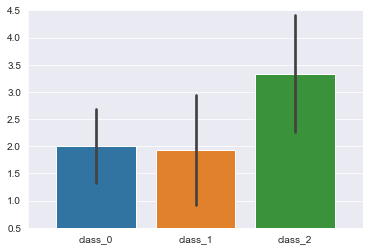

In [7]:
plt.figure(1)
plot = sns.barplot(data=[x[i] for i in range(k)], ci='sd')
plot.set_xticklabels(wine.target_names)
plot.margins(0.1)
plot.set_ylim(0.5, 4.5)

#### Ans:

Since p_value < α, we rejected H<sub>0. 

There is significant difference in the mean of malic_acid across the 3 type of irises.

The effect size calculated by eta-squared is 0.3 which is large.

β (Type II Error) = 0 which means if we rejected H1, there is a 0% chance that we are wrong.

The power of this analysis is 1 which mean that we have a 100% chance that we correctly reject H0

##### Post Hoc Test:

Since we knew there was difference in group means, we wanted to find which group differs from other groups. To compare all group pairs, we employed a Tukey HSD test.

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data_x, groups=data_y, alpha=alpha)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   -0.078 0.8855 -0.4703 0.3143  False
     0      2   1.3231    0.0  0.8902 1.7559   True
     1      2   1.4011    0.0  0.9849 1.8172   True
---------------------------------------------------



---

### Question 3

They hypothesized that the more people merely watch others, the more they believe they can perform the skill themselves.

They compared extensively watching the “tablecloth trick” with extensively reading or thinking about it. Participants assessed their own abilities to perform the “tablecloth trick.” 

Participants were asked to rate from 1 to 7. 

The study was a 3 (type of exposure: watch, read, think) ? 2 (amount of exposure: low, high) between-subjects design.

* From [REFERENCE](https://www.alexanderdemos.org/ANOVA9.html#Basic_Rules)

In [9]:
### data
num_cols = 3
num_rows = 2 
alpha = 0.05

data = {"rate": [1, 3, 3, 4, 2, 
                 3, 2, 3, 1, 4,
                 3, 3, 2, 3, 1,
                 6, 4, 7, 5, 5, 
                 5, 3, 2, 3, 2, 
                 3, 2, 1, 4, 4],
        "type": (["Watching"]*5 + ["Reading"]*5 + ["Thinking"]*5) * 2,
        "exposure": ["Low"]*15 + ["High"]*15}
df = pd.DataFrame(data)
data_array = np.array(data["rate"]).reshape(2, 3, 5)
print(data_array)

[[[1 3 3 4 2]
  [3 2 3 1 4]
  [3 3 2 3 1]]

 [[6 4 7 5 5]
  [5 3 2 3 2]
  [3 2 1 4 4]]]


In [10]:
n_cell = 5 * np.ones((2, 3), dtype='int')
mean_cell = np.mean(data_array, axis=2)
SSW_cell = np.sum(np.square(data_array - mean_cell.reshape(2, 3, 1)), axis=2)
print("mean_cell: ")
print(mean_cell)
print("SSW_cell: ")
print(SSW_cell)
print("")

n_grand = np.sum(n_cell)
n_cols = np.sum(n_cell, axis=0)
n_rows = np.sum(n_cell, axis=1)
print("n_grand: {}".format(n_grand))
print("n_rows: {}".format(n_rows))
print("n_cols: {}".format(n_cols))
print("")

mean_grand = np.average(mean_cell, weights=n_cell)
mean_rows = np.average(mean_cell, axis=1, weights=n_cell)
mean_cols = np.average(mean_cell, axis=0, weights=n_cell)
print("mean_grand: {}".format(mean_grand))
print("mean_rows: {}".format(mean_rows))
print("mean_cols: {}".format(mean_cols))
print("")

SSW_c = np.sum(SSW_cell)
SSB_col = np.sum( n_cols * np.square(mean_cols - mean_grand) )
SSB_row = np.sum( n_rows * np.square(mean_rows - mean_grand) )
SST = 1386.8456
SS_rxc = SST - SSW_c - SSB_col - SSB_row
print("SSW_c: {:.4f}\tSSB_col: {:.4f}\tSSB_row: {:.4f}".format(SSW_c, SSB_col, SSB_row))
print("SST: {:.4f}\tSS_rxc: {:.4f}".format(SST, SS_rxc))
print("")

df_SSW_c = n_grand - num_cols * num_rows
df_SSB_col = num_cols - 1
df_SSB_row = num_rows - 1
df_SS_rxc = (num_cols - 1) * (num_rows - 1)
df_SST = n_grand - 1
print("df_SSW_c: {}\tdf_SSB_col: {}\tdf_SSB_row: {}".format(df_SSW_c, df_SSB_col, df_SSB_row))
print("df_SST: {}\tdf_SS_rxc: {}".format(df_SST, df_SS_rxc))

mean_cell: 
[[2.6 2.6 2.4]
 [5.4 3.  2.8]]
SSW_cell: 
[[5.2 5.2 3.2]
 [5.2 6.  6.8]]

n_grand: 30
n_rows: [15 15]
n_cols: [10 10 10]

mean_grand: 3.1333333333333333
mean_rows: [2.53333333 3.73333333]
mean_cols: [4.  2.8 2.6]

SSW_c: 31.6000	SSB_col: 11.4667	SSB_row: 10.8000
SST: 1386.8456	SS_rxc: 1332.9789

df_SSW_c: 24	df_SSB_col: 2	df_SSB_row: 1
df_SST: 29	df_SS_rxc: 2


Main Effects:

H<sub>0 : All groups have equal means

H<sub>1 : At least 1 group is different from the other

Interaction:

H<sub>0 : There is no interaction between factors A and B. All the mean differences between treatment conditions are explained by the main effects.

H<sub>1 : There is an interaction between factors A and B. The mean differences between treatment conditions are not what would be predicted from the overall main effects of the two factors.

In [11]:
MSW_c = SSW_c / df_SSW_c
MSB_col = SSB_col / df_SSB_col
MSB_row = SSB_row / df_SSB_row
MS_rxc = SS_rxc / df_SS_rxc
print("MSW_c: {:.4f}\tMSB_col: {:.4f}\tMSB_row: {:.4f}".format(MSW_c, MSB_col, MSB_row))
print("MS_rxc: {:.4f}".format(MS_rxc))
print("")


f_col = MSB_col / MSW_c
f_col_crit = f_test.ppf(1 - alpha, dfn=df_SSB_col, dfd=df_SSW_c)
p_value_col = 1 - f_test.cdf(f_col, dfn=df_SSB_col, dfd=df_SSW_c)
eta_2_col = SSB_col / SST
### non-central parameter
nc_col = SSB_col / MSW_c
beta_col = ncf.cdf(f_col_crit, dfn=df_SSB_col, dfd=df_SSW_c, nc=nc_col)
print("f_col: {:.3f}\tf_col_crit: {:.3f}".format(f_col, f_col_crit))
print("p_value_col: {:.5f}".format(p_value_col))
print("eta_2_col: {:.4f}".format(eta_2_col))
print("Beta_col: {:.4f}\tPower_col: {:.4f}".format(beta_col, 1 - beta_col))
print("")


f_row = MSB_row / MSW_c
f_row_crit = f_test.ppf(1 - alpha, dfn=df_SSB_row, dfd=df_SSW_c)
p_value_row = 1 - f_test.cdf(f_row, dfn=df_SSB_row, dfd=df_SSW_c)
eta_2_row = SSB_row / SST
### non-central parameter
nc_row = SSB_row / MSW_c
beta_row = ncf.cdf(f_row_crit, dfn=df_SSB_row, dfd=df_SSW_c, nc=nc_row)
print("f_row: {:.3f}\tf_row_crit: {:.3f}".format(f_row, f_row_crit))
print("p_value_row: {:.5f}".format(p_value_row))
print("eta_2_row: {:.4f}".format(eta_2_row))
print("Beta_row: {:.4f}\tPower_row: {:.4f}".format(beta_row, 1 - beta_row))
print("")


f_rxc = MS_rxc / MSW_c
f_rxc_crit = f_test.ppf(1 - alpha, dfn=df_SS_rxc, dfd=df_SSW_c)
p_value_rxc = 1 - f_test.cdf(f_rxc, dfn=df_SS_rxc, dfd=df_SSW_c)
eta_2_rxc = SS_rxc / SST
### non-central parameter
nc_rxc = SS_rxc / MSW_c
beta_rxc = ncf.cdf(f_rxc_crit, dfn=df_SS_rxc, dfd=df_SSW_c, nc=nc_rxc)
print("f_rxc: {:.3f}\tf_rxc_crit: {:.3f}".format(f_rxc, f_rxc_crit))
print("p_value_rxc: {:.5f}".format(p_value_rxc))
print("eta_2_rxc: {:.4f}".format(eta_2_rxc))
print("Beta_rxc: {:.4f}\tPower_row: {:.4f}".format(beta_rxc, 1 - beta_rxc))

MSW_c: 1.3167	MSB_col: 5.7333	MSB_row: 10.8000
MS_rxc: 666.4895

f_col: 4.354	f_col_crit: 3.403
p_value_col: 0.02435
eta_2_col: 0.0083
Beta_col: 0.3018	Power_col: 0.6982

f_row: 8.203	f_row_crit: 4.260
p_value_row: 0.00855
eta_2_row: 0.0078
Beta_row: 0.2154	Power_row: 0.7846

f_rxc: 506.195	f_rxc_crit: 3.403
p_value_rxc: 0.00000
eta_2_rxc: 0.9612
Beta_rxc: 0.0000	Power_row: 1.0000


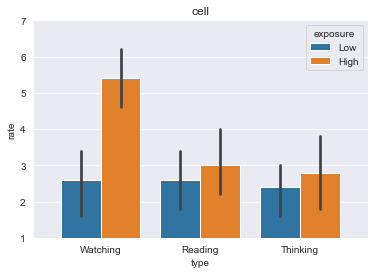

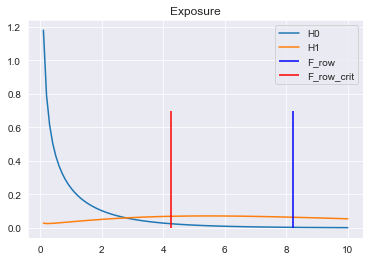

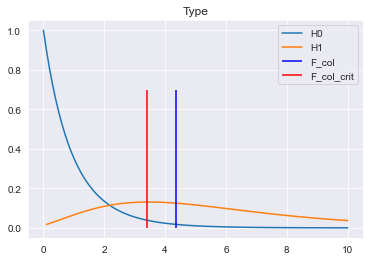

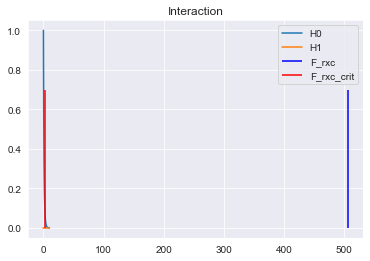

In [12]:
plt.figure(1)
plot = sns.barplot(x="type", y="rate", hue='exposure', data=df)
plot.set(title="cell")
plot.margins(0.1)
plot.set_ylim(1, 7)

x = np.linspace(0, 10, num=100)
y0 = f_test.pdf(x, dfn=df_SSB_row, dfd=df_SSW_c)
y1 = ncf.pdf(x, dfn=df_SSB_row, dfd=df_SSW_c, nc=nc_row)
plt.figure(2)
plot = sns.lineplot(x=x, y=y0, label="H0")
plot = sns.lineplot(x=x, y=y1, label="H1")
plot.set(title="Exposure")
plt.vlines(f_row, 0, 0.7, 'b', label='F_row')
plt.vlines(f_row_crit, 0, 0.7, 'r', label='F_row_crit')
plt.legend()

y0 = f_test.pdf(x, dfn=df_SSB_col, dfd=df_SSW_c)
y1 = ncf.pdf(x, dfn=df_SSB_col, dfd=df_SSW_c, nc=nc_col)
plt.figure(3)
plot = sns.lineplot(x=x, y=y0, label="H0")
plot = sns.lineplot(x=x, y=y1, label="H1")
plot.set(title="Type")
plt.vlines(f_col, 0, 0.7, 'b', label='F_col')
plt.vlines(f_col_crit, 0, 0.7, 'r', label='F_col_crit')
plt.legend()

y0 = f_test.pdf(x, dfn=df_SS_rxc, dfd=df_SSW_c)
y1 = ncf.pdf(x, dfn=df_SS_rxc, dfd=df_SSW_c, nc=nc_rxc)
plt.figure(4)
plot = sns.lineplot(x=x, y=y0, label="H0")
plot = sns.lineplot(x=x, y=y1, label="H1")
plot.set(title="Interaction")
plt.vlines(f_rxc, 0, 0.7, 'b', label='F_rxc')
plt.vlines(f_rxc_crit, 0, 0.7, 'r', label='F_rxc_crit')
plt.legend()

#### Ans:

Since p_value > α in the main effect, we rejected H<sub>0. 

There is a significant main effect for type (columns) on the rating.

There is a significant main effect for exposure (rows) on the rating. 

Since p_value > α in the interaction, we rejected H<sub>0.

There is a significant interaction between exposure and type.

#### Main Effects vs Interaction

They hypothesized that spending more time watching YouTube videos would cause someone to think the can do the tablecloth trick. Therefore, from their hypothesis, we would predict that the degree of exposure would impact only the watched condition. 

The high exposure group should have a higher mean on watching over the low exposure group, but there is no differences between low and high exposure on reading or thinking about the trick.

The interaction is telling us "when we test the exposure, there is differences in different type (watching, reading, thinking). As a result, we need to test the simple effects (one factor ANOVA) of level of exposure at each type.

In [13]:
### Subset the data to only have type = Watching
data_w = data_array[:, 0, :]
mean_grand_w = np.mean(data_w)
mean_b_w = np.mean(data_w, axis=1)
SSB_w = np.sum(5 * np.square(mean_b_w - mean_grand_w))
df_MSB_w = num_rows - 1
MSB_w = SSB_w / df_MSB_w

### To calculate the error term, we can not use
### SS Within in the watching subset. Instead,
### we use the SS Within calculated from the
### 2-way ANOVA.
MSW_w = MSW_c
df_MSW_w = df_SSW_c
f_w = MSB_w / MSW_w
p_value_w = 1 - f_test.cdf(f_w, dfn=df_MSB_w, dfd=df_MSW_w)
print("type = Watching:")
print("dfn: {}\tdfd: {}".format(df_MSB_w, df_MSW_w))
print("f: {}\tp_value: {}".format(f_w, p_value_w))
print("")


### Subset the data to only have type = Reading
data_r = data_array[:, 1, :]
mean_grand_r = np.mean(data_r)
mean_b_r = np.mean(data_r, axis=1)
SSB_r = np.sum(5 * np.square(mean_b_r - mean_grand_r))
df_MSB_r = num_rows - 1
MSB_r = SSB_r / df_MSB_r

### To calculate the error term, we can not use
### SS Within in the watching subset. Instead,
### we use the SS Within calculated from the
### 2-way ANOVA.
MSW_r = MSW_c
df_MSW_r = df_SSW_c
f_r = MSB_r / MSW_r
p_value_r = 1 - f_test.cdf(f_r, dfn=df_MSB_r, dfd=df_MSW_r)
print("type = Reading:")
print("dfn: {}\tdfd: {}".format(df_MSB_r, df_MSW_r))
print("f: {}\tp_value: {}".format(f_r, p_value_r))
print("")


### Subset the data to only have type = Thinking
data_t = data_array[:, 2, :]
mean_grand_t = np.mean(data_t)
mean_b_t = np.mean(data_t, axis=1)
SSB_t = np.sum(5 * np.square(mean_b_t - mean_grand_t))
df_MSB_t = num_rows - 1
MSB_t = SSB_t / df_MSB_t

### To calculate the error term, we can not use
### SS Within in the watching subset. Instead,
### we use the SS Within calculated from the
### 2-way ANOVA.
MSW_t = MSW_c
df_MSW_t = df_SSW_c
f_t = MSB_t / MSW_c
p_value_t = 1 - f_test.cdf(f_t, dfn=df_MSB_t, dfd=df_MSW_t)
print("type = Thinking:")
print("dfn: {}\tdfd: {}".format(df_MSB_t, df_MSW_t))
print("f: {}\tp_value: {}".format(f_t, p_value_t))
print("")

type = Watching:
dfn: 1	dfd: 24
f: 14.886075949367093	p_value: 0.0007532957173216337

type = Reading:
dfn: 1	dfd: 24
f: 0.3037974683544302	p_value: 0.5866067187582621

type = Thinking:
dfn: 1	dfd: 24
f: 0.3037974683544302	p_value: 0.5866067187582621



##### Conclusion

Only type watching has a p_value less than 0.05. We can conclude that the means of ratings are significantly diffent in the exposure group only on type watching.  